### importing essential library and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

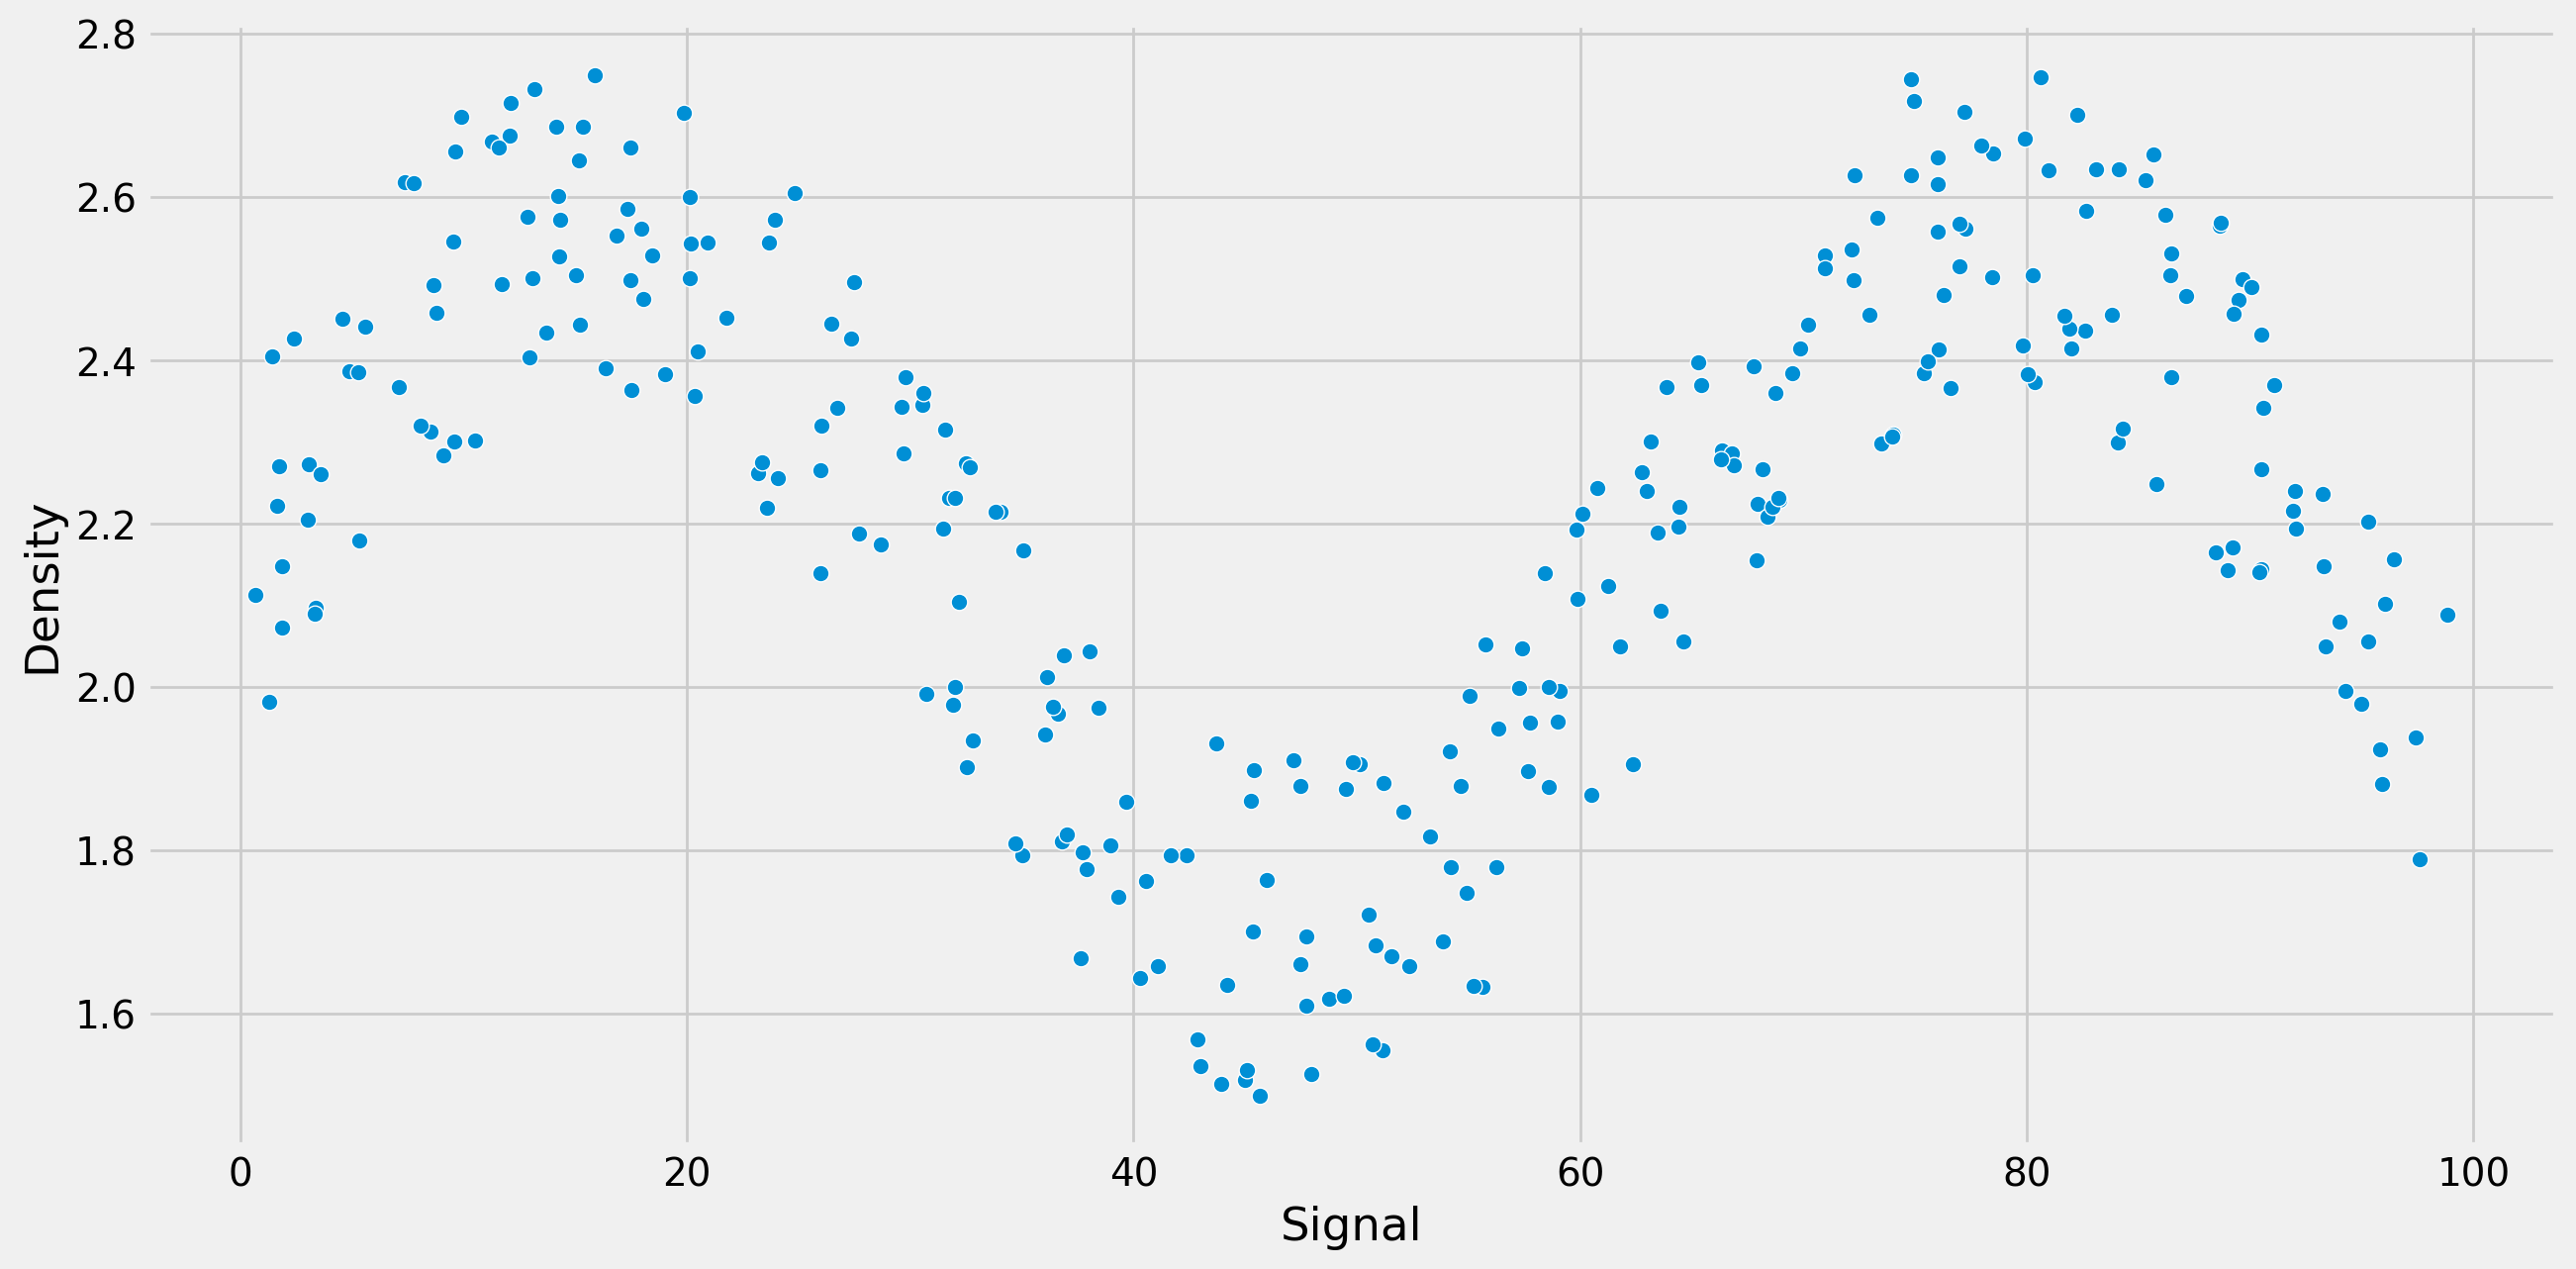

In [5]:
plt.figure(dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

## Splitting the Data

splitting the data in order to be able to have a Test set for performance metric evaluation.

In [6]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_preds = lr_model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

What does the fit look like?

In [13]:
signal_range = np.arange(0,100)

In [14]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

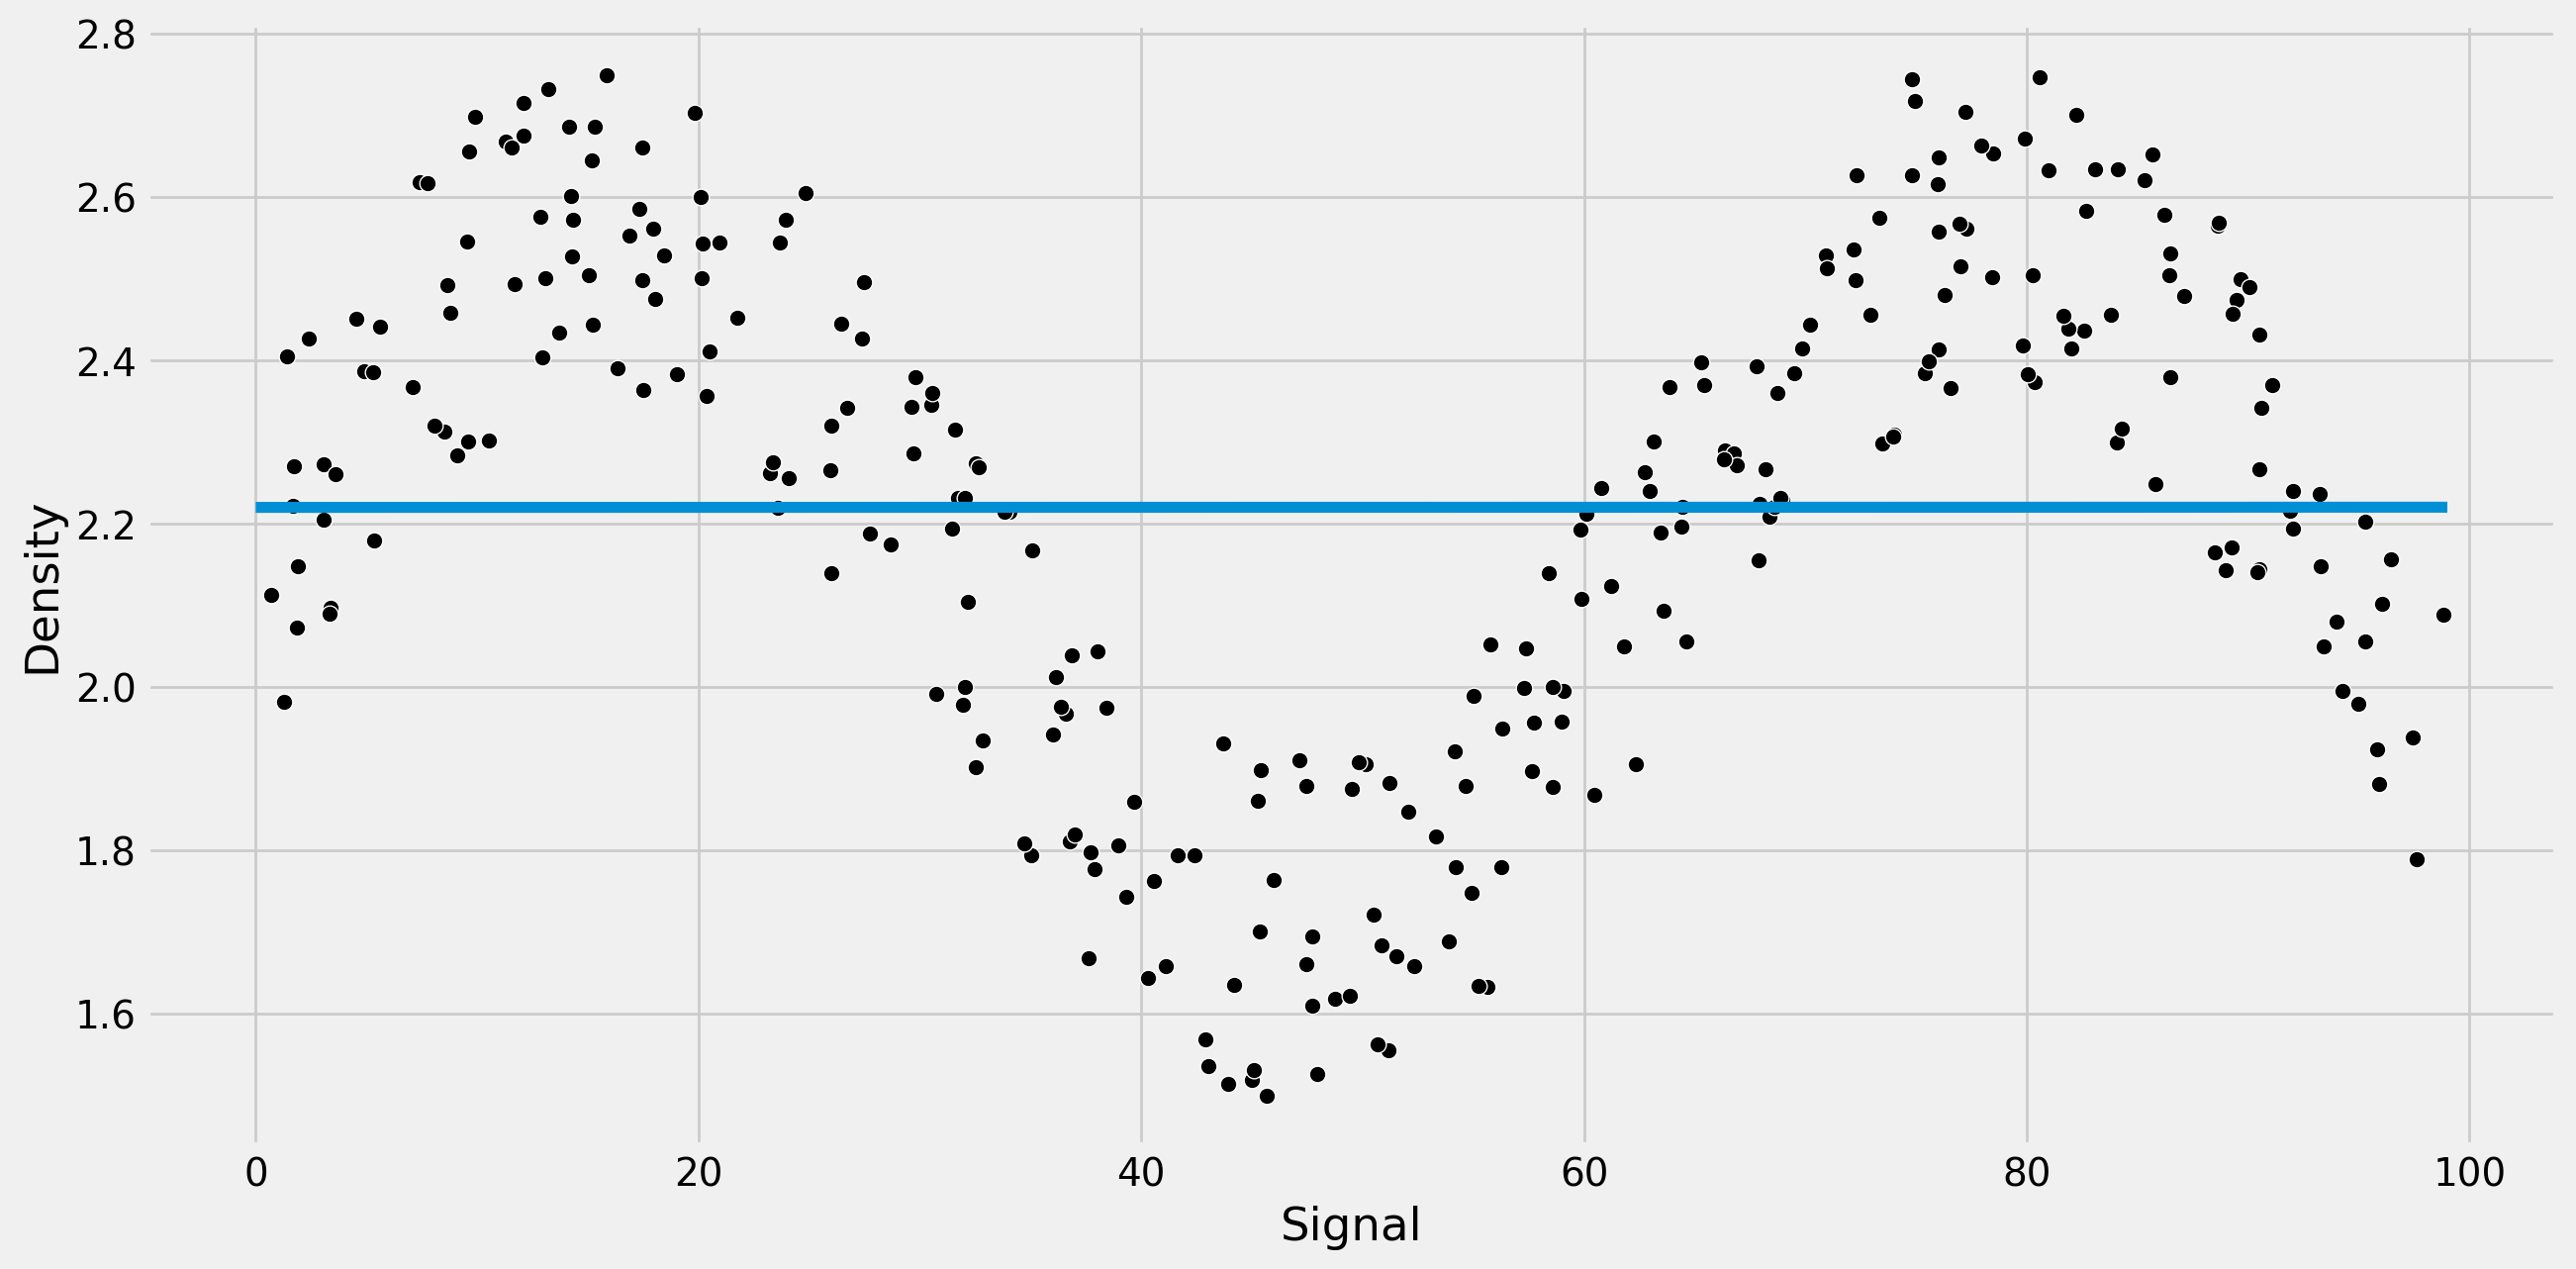

In [15]:
plt.figure(dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here.

### Function to Help Run Models

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


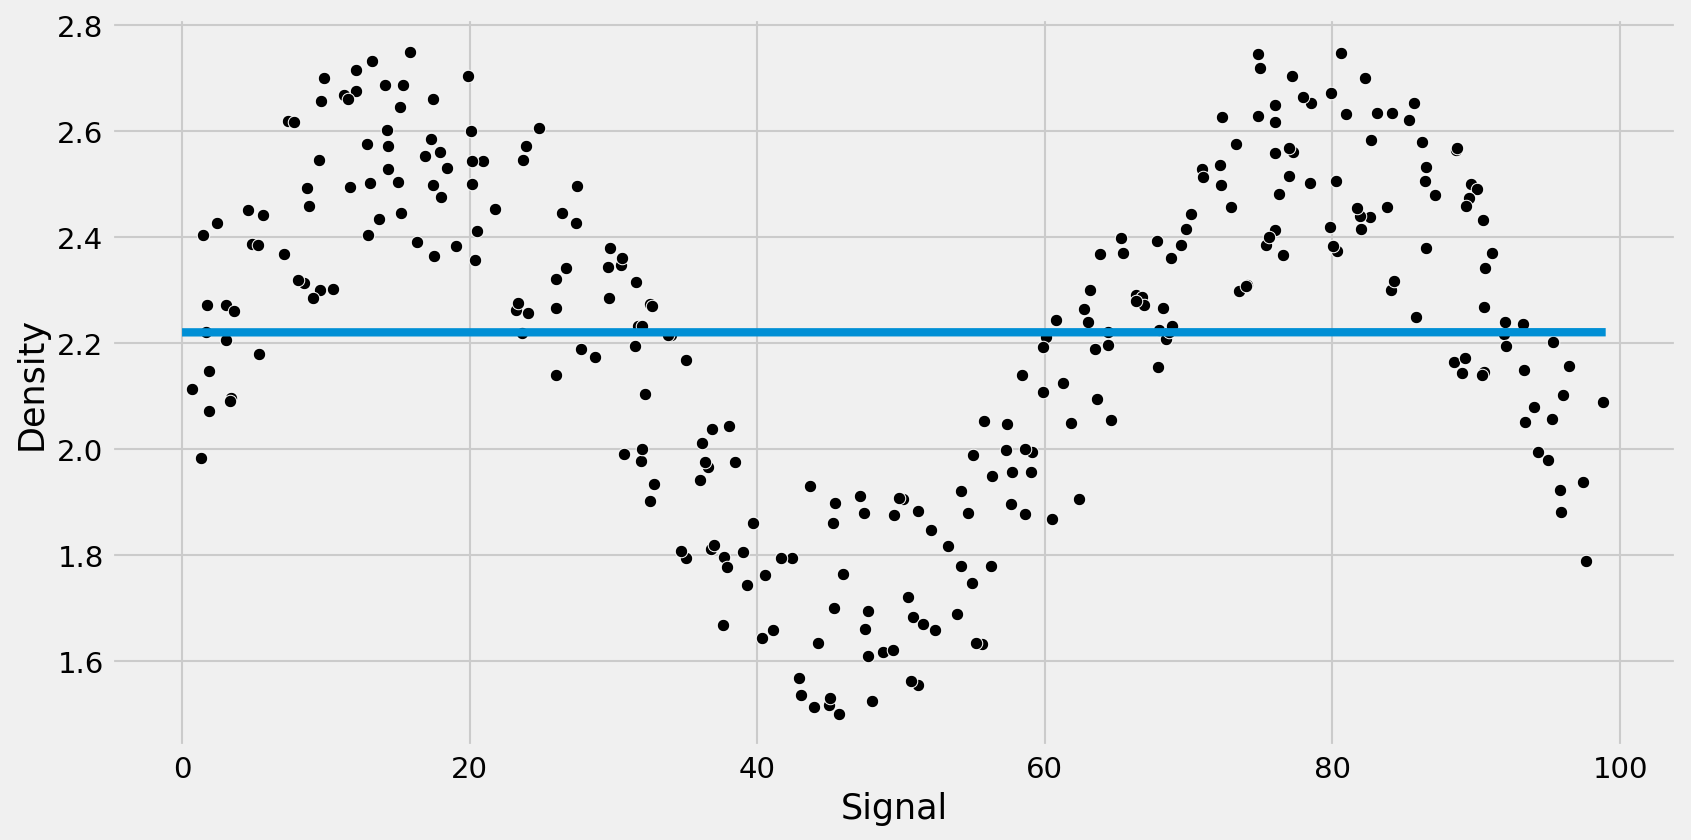

In [18]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [20]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725559


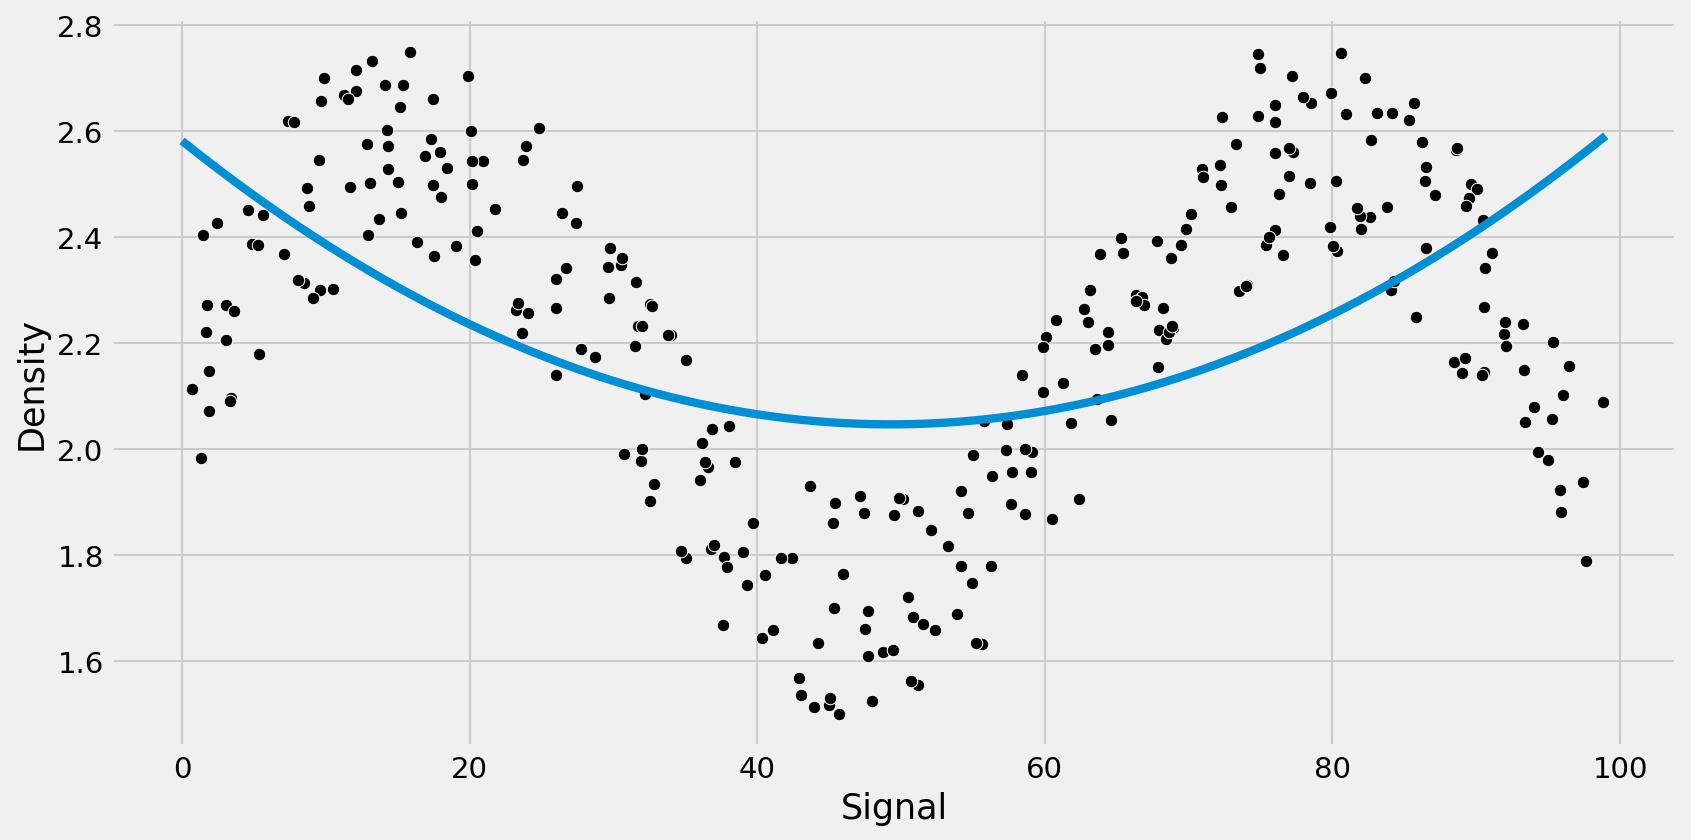

In [21]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.1405023263432936


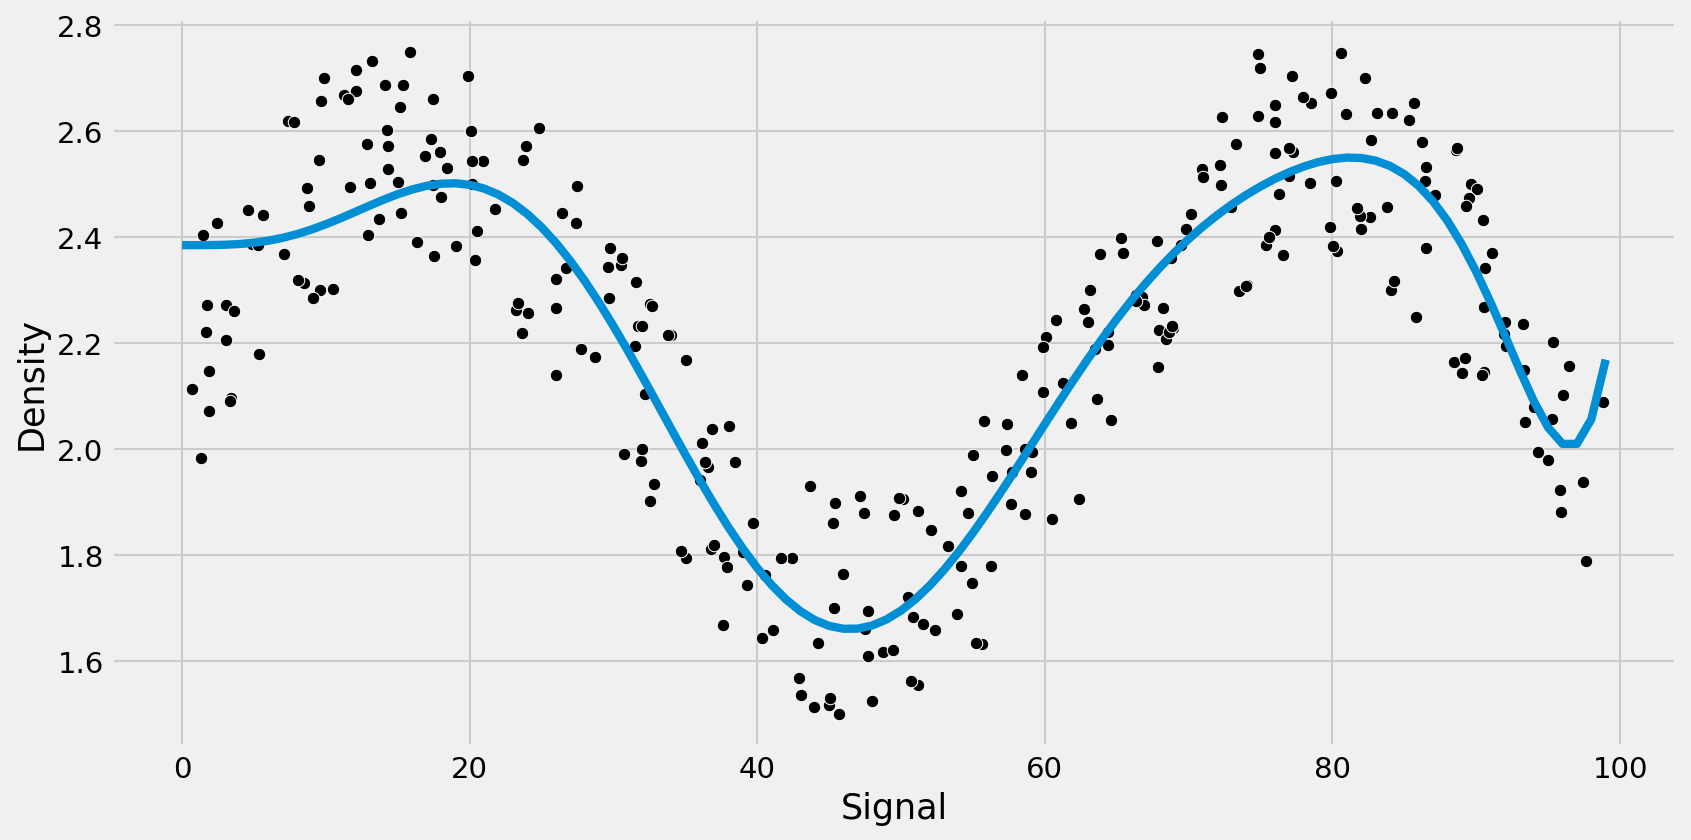

In [22]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [23]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


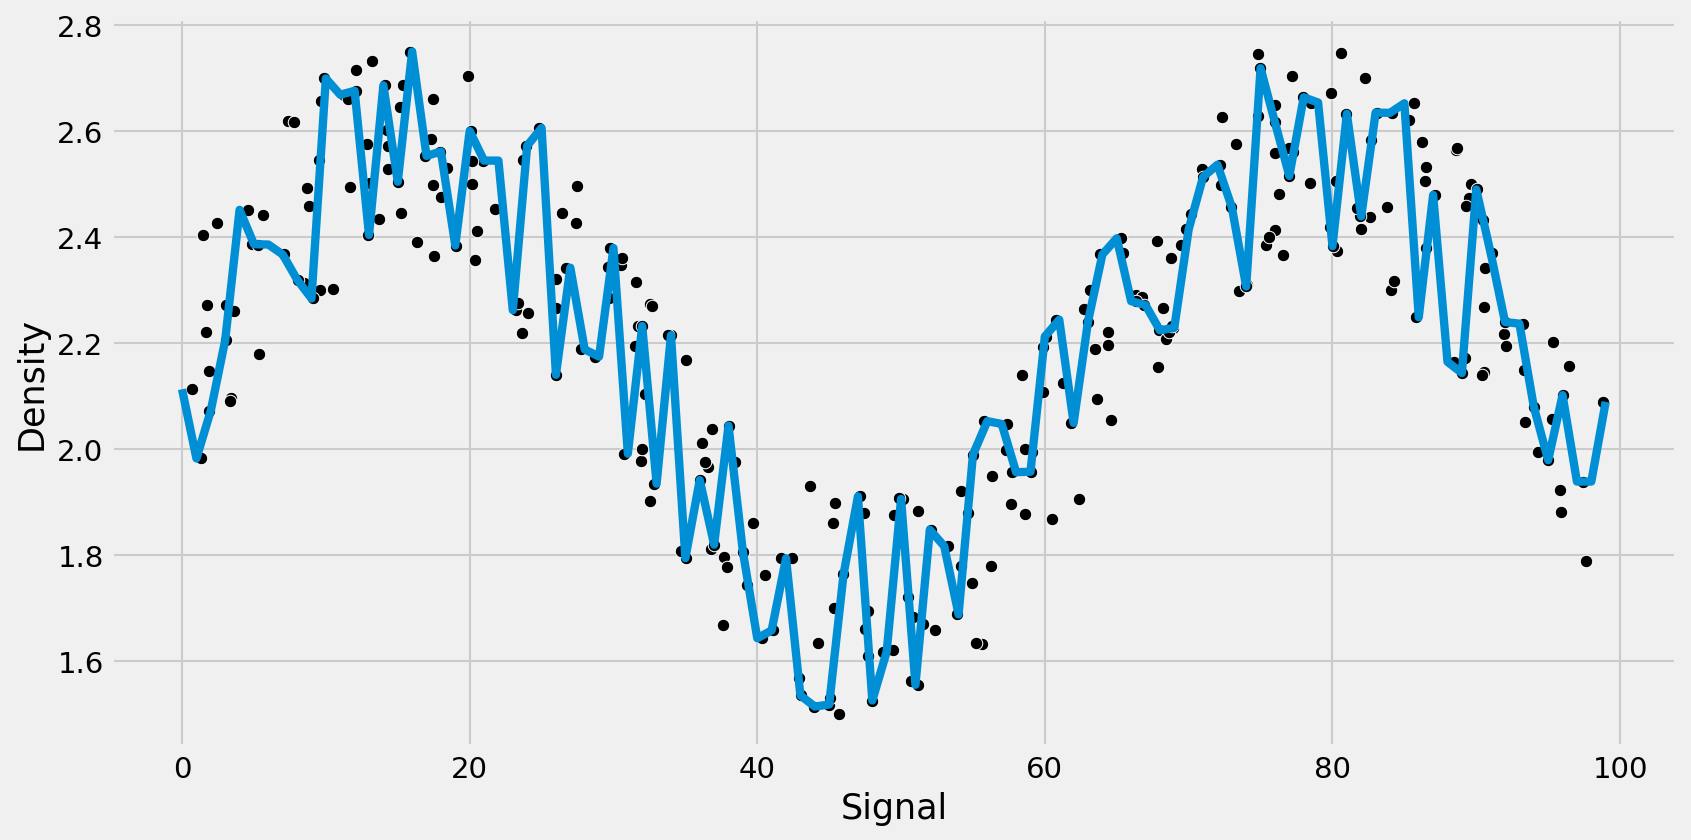

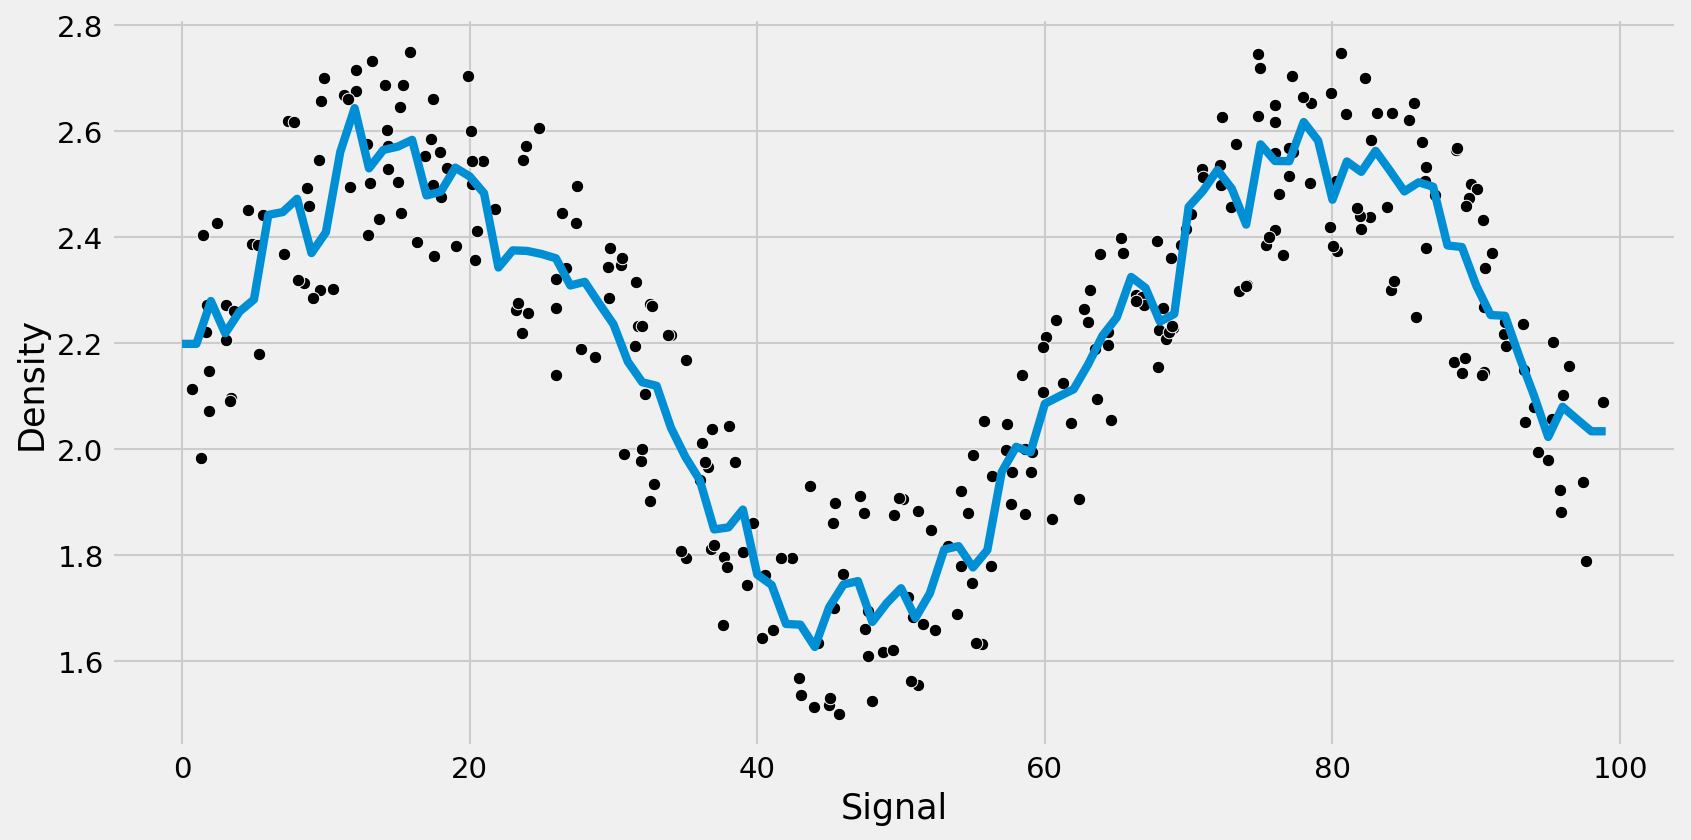

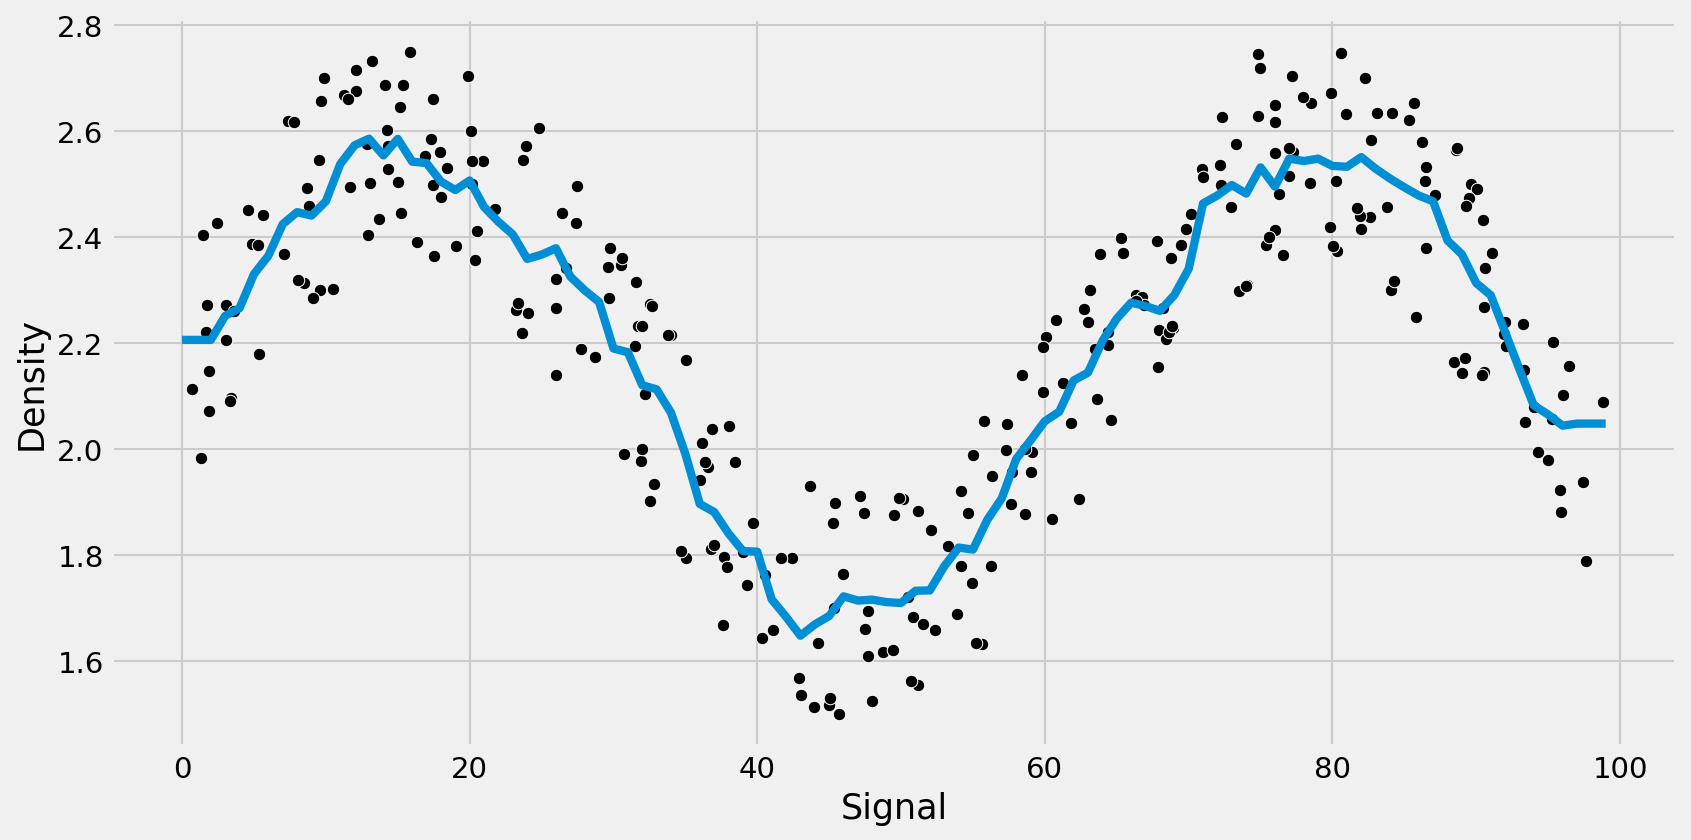

In [24]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


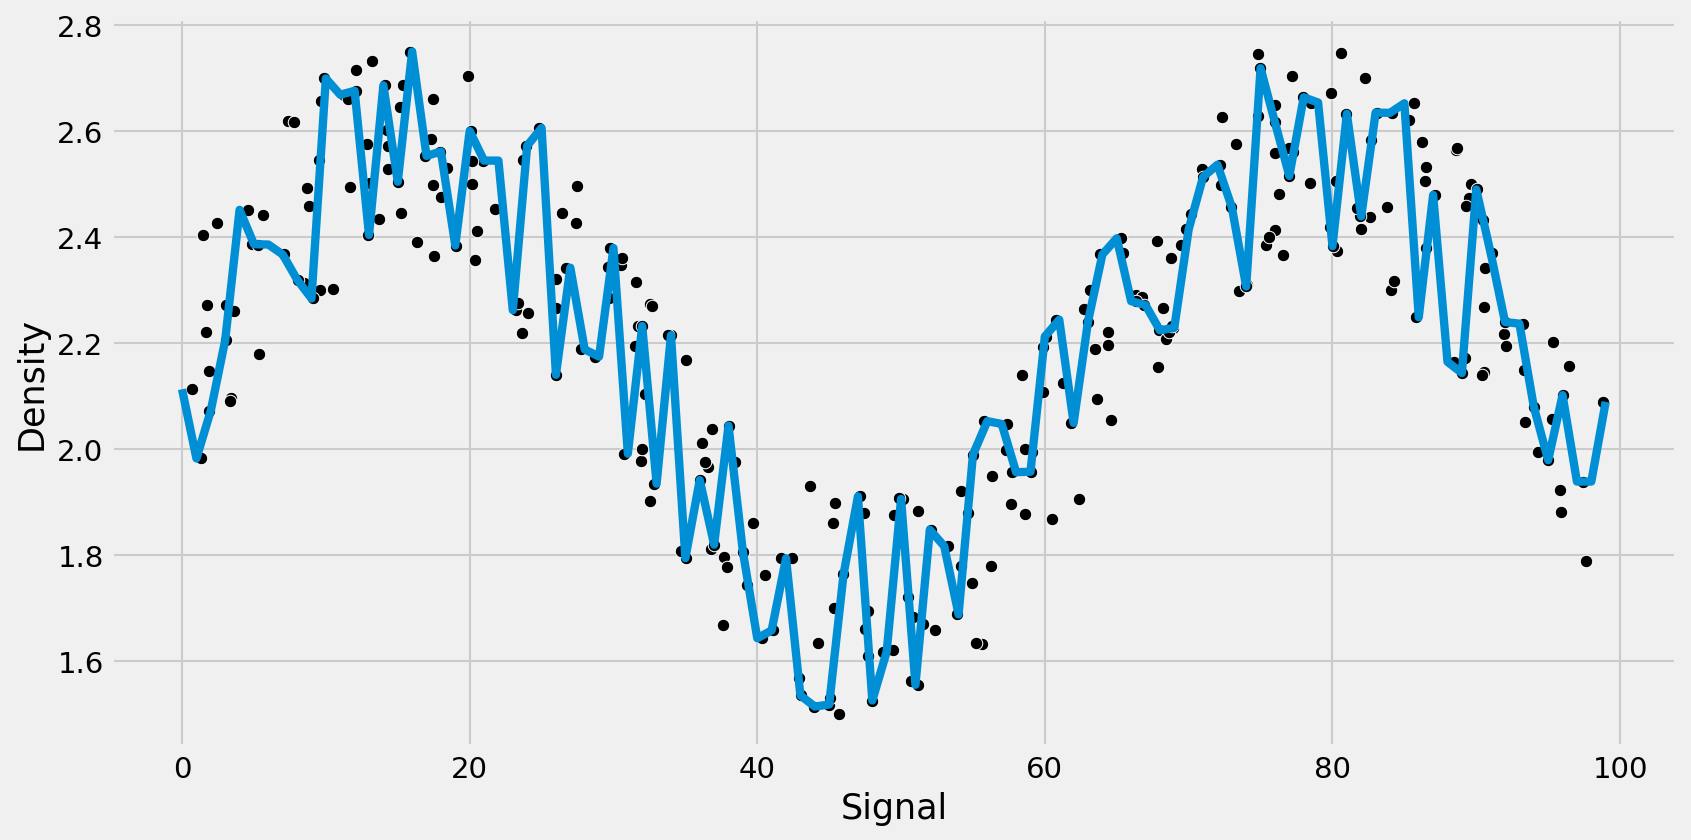

In [26]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [27]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [28]:
from sklearn.svm import SVR

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [31]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


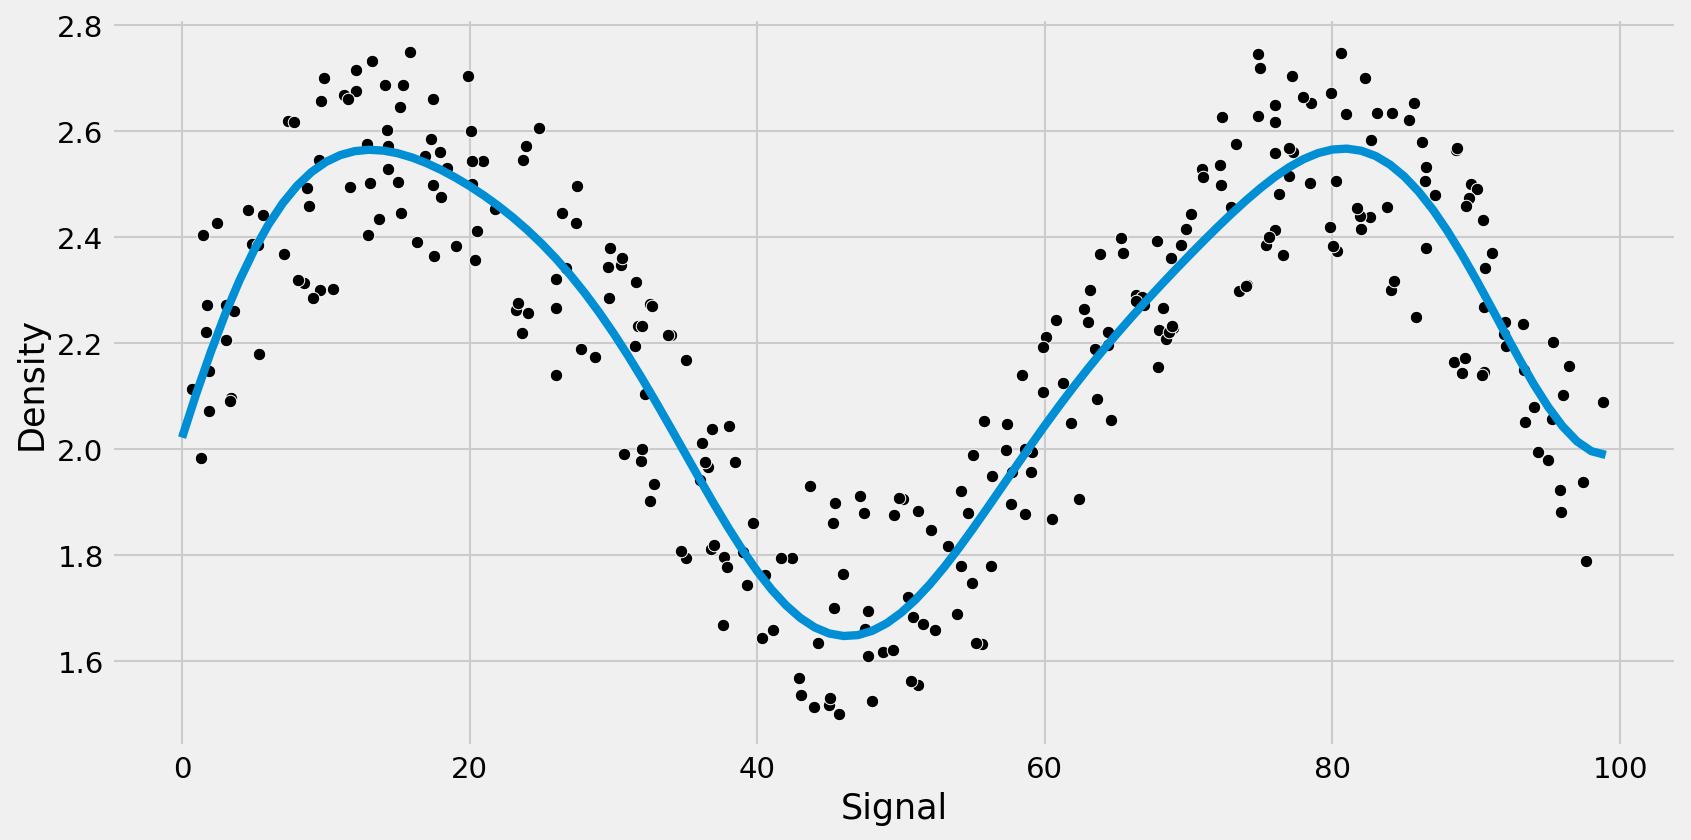

In [32]:
run_model(grid,X_train,y_train,X_test,y_test)

In [33]:
grid.best_estimator_

SVR(C=1000)

---

## Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.13567941357167346
RMSE : 0.1381336890963991
RMSE : 0.13406031602544485


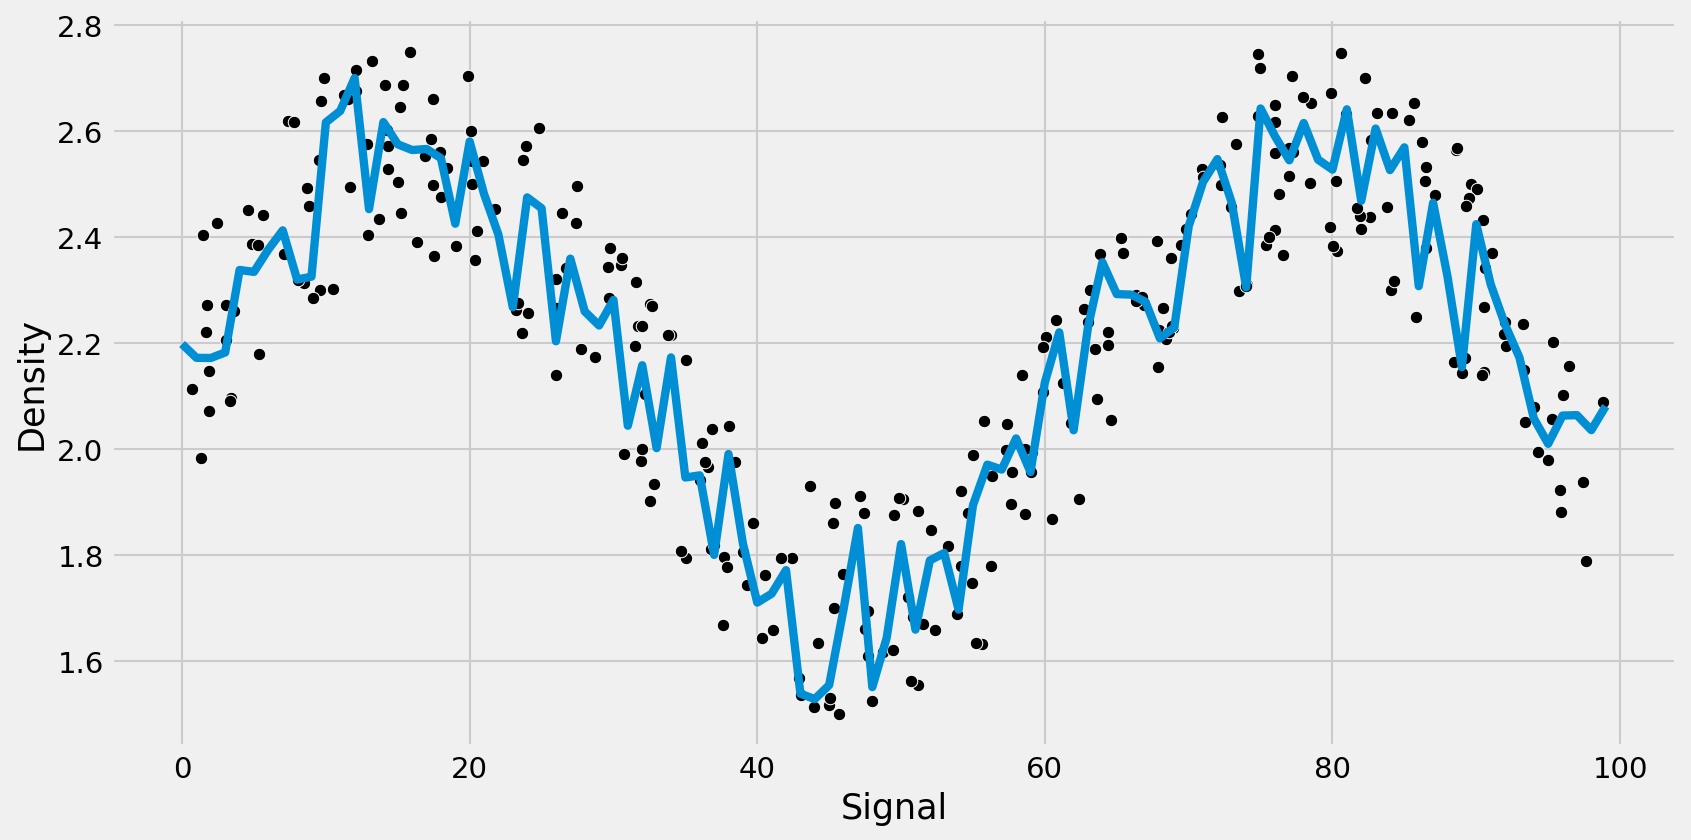

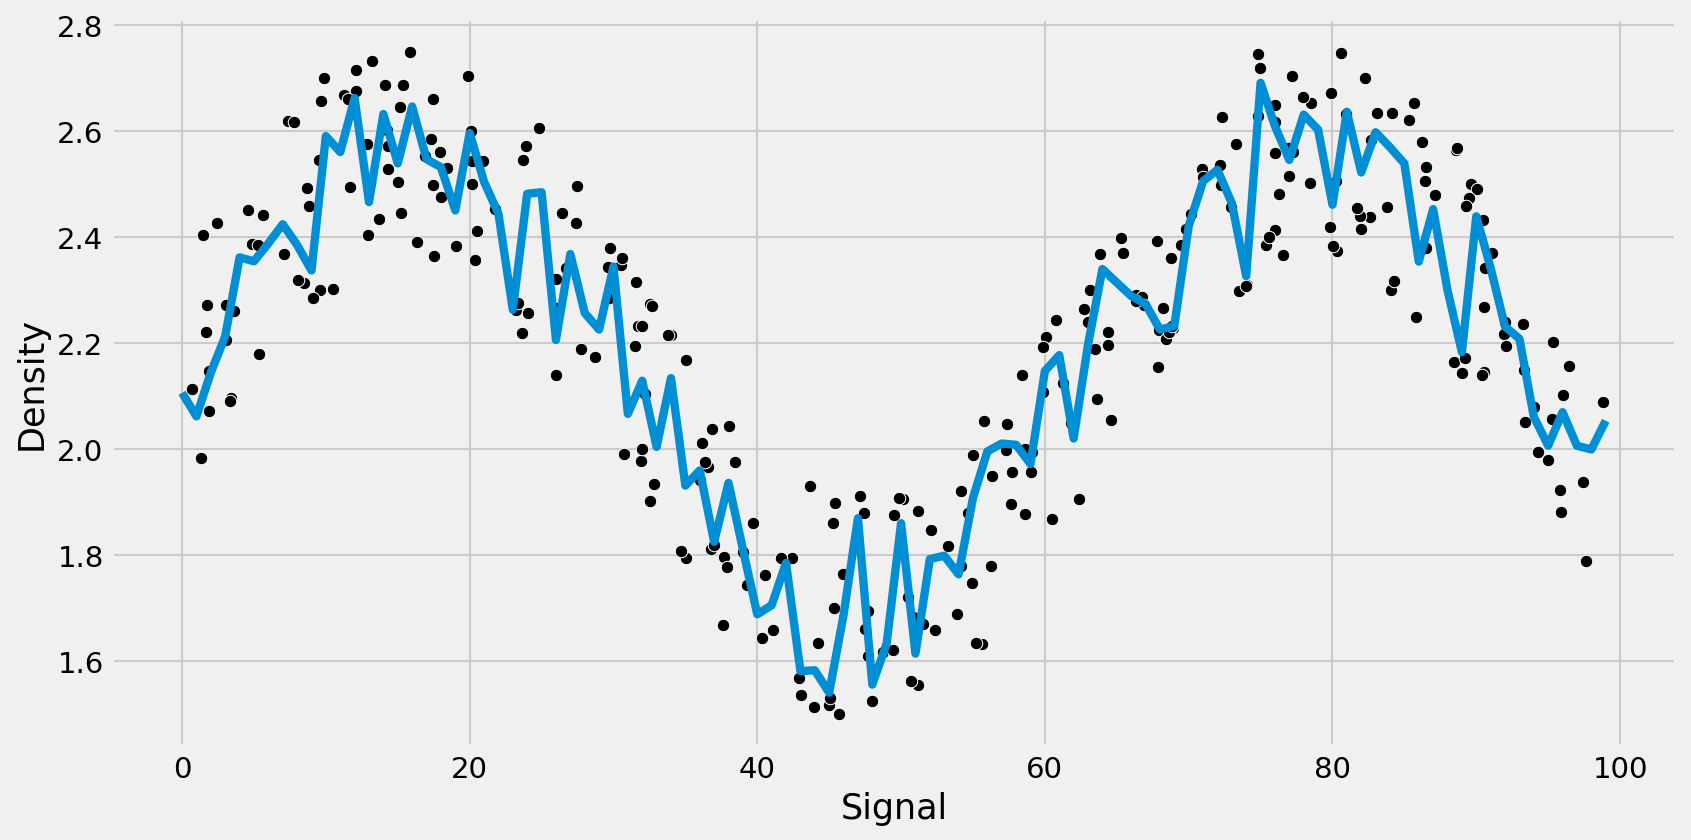

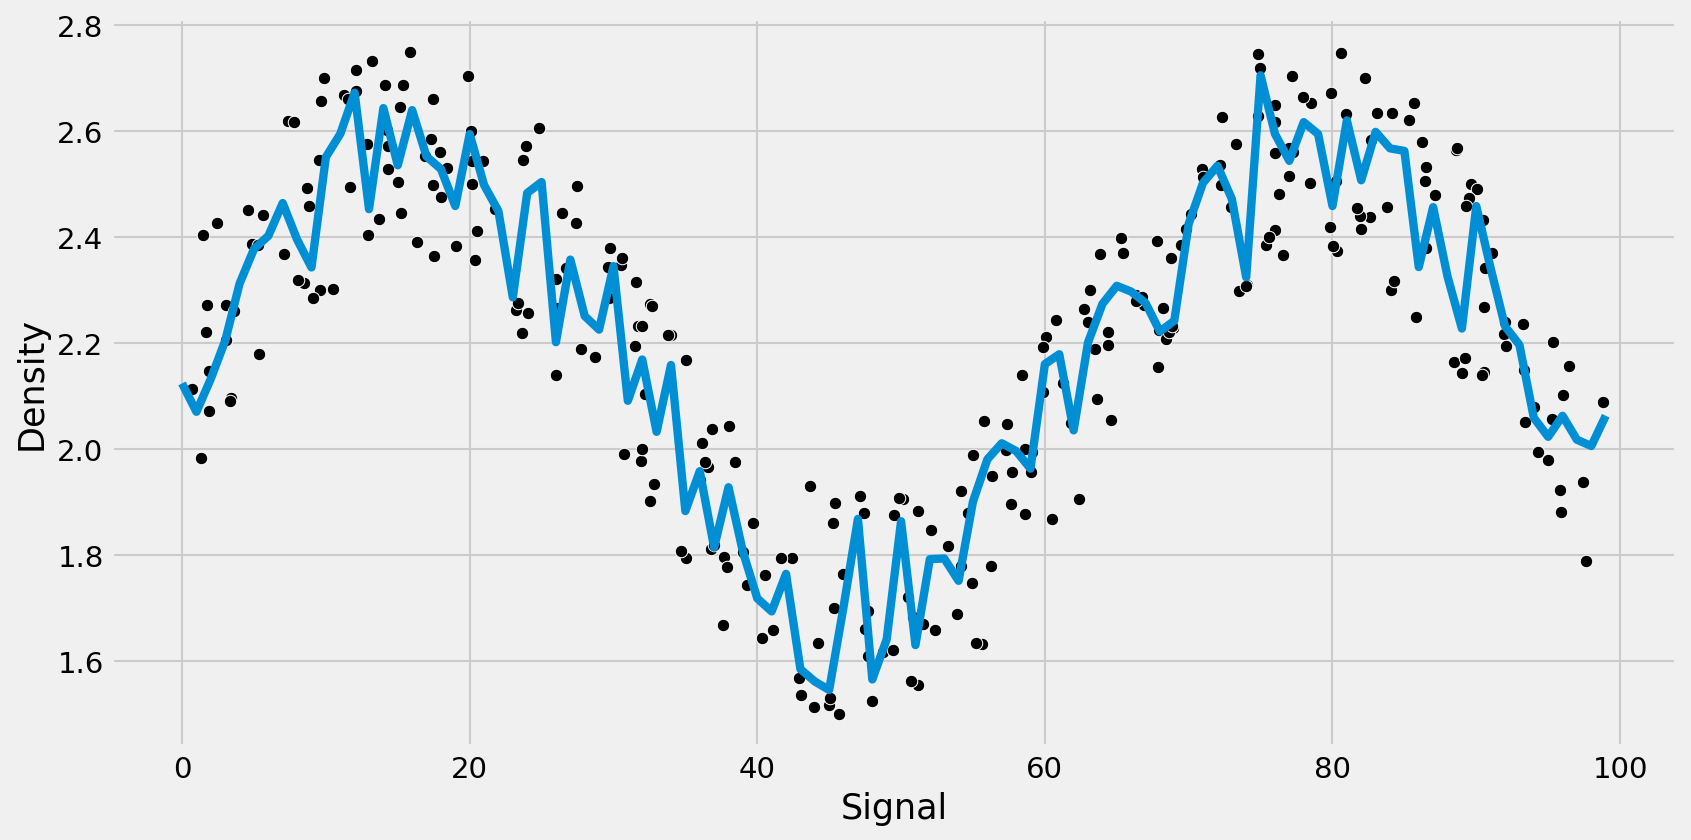

In [35]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13294148649584667


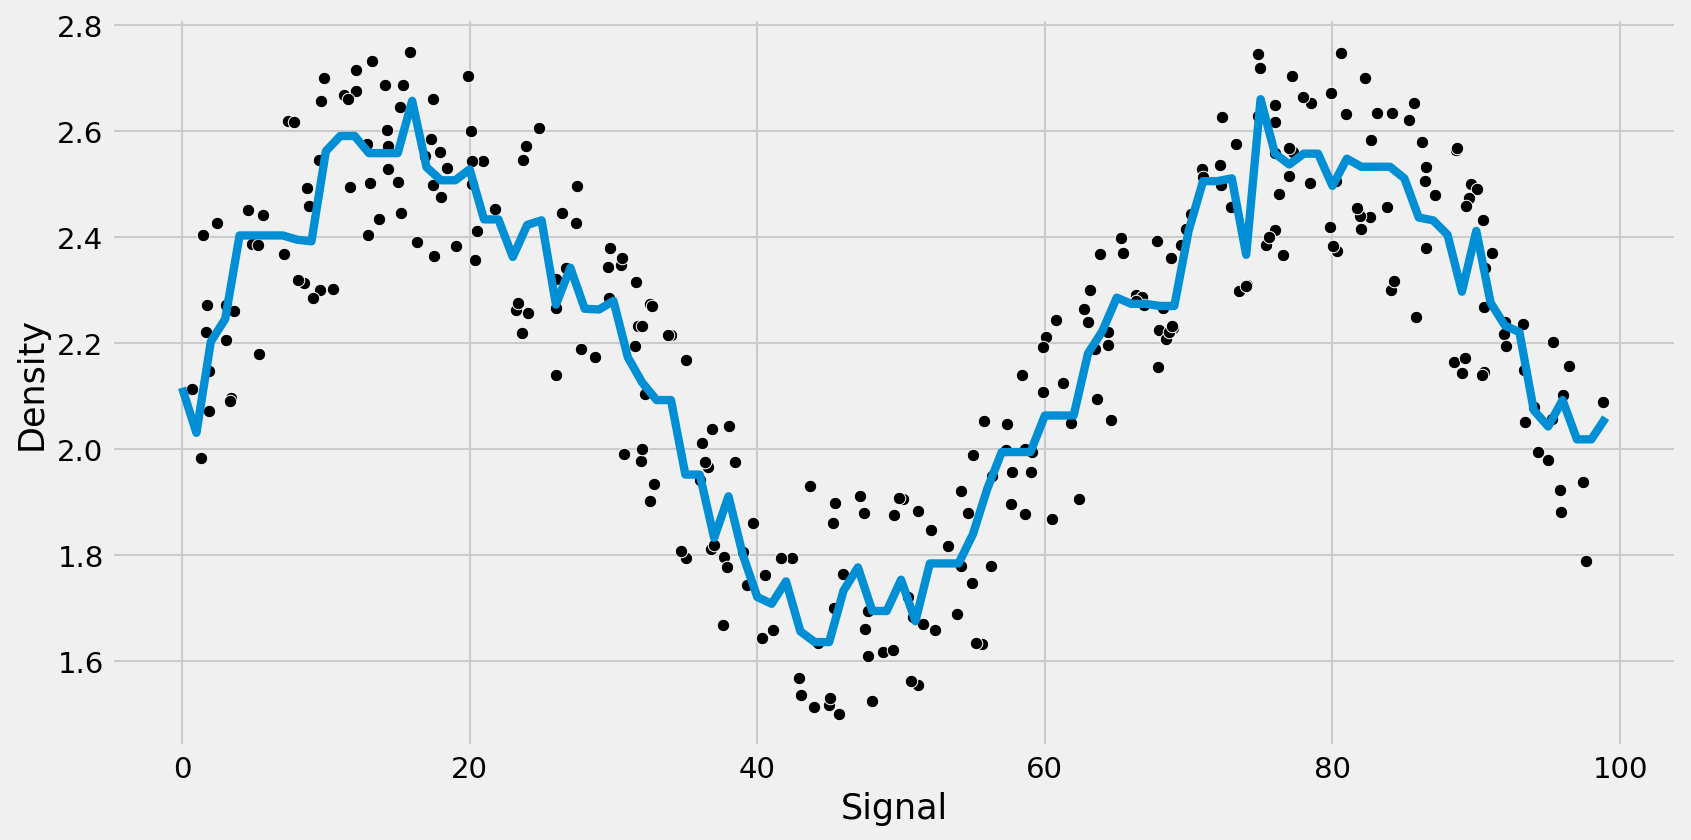

In [37]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [38]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


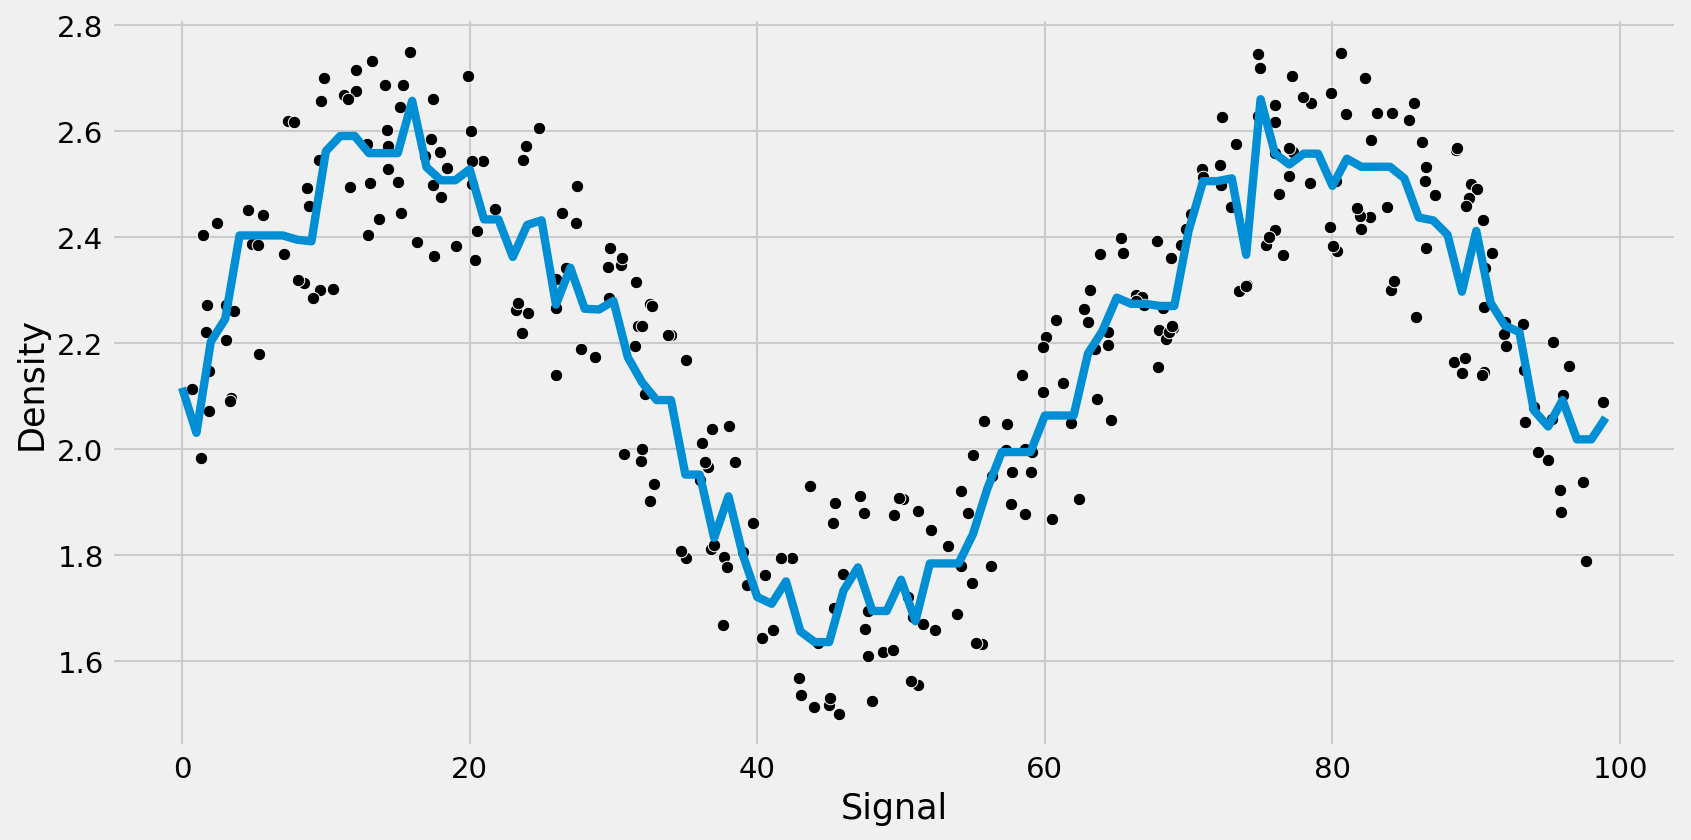

In [39]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [41]:
# lets choose support vector regression for making prediction
data = [[21.765897]]
grid.predict(data)

array([2.46339789])

**orignal result was 2.45 Rock Density kg/m3 and our model predict 2.46 Rock Density kg/m3 which is quite good**